# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [231]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [232]:
import cv2
import matplotlib.pyplot as plt

In [233]:
single_data = x_train[0]
# single_data = cv2.cvtColor(single_data,cv2.COLOR_BGR2RGB)

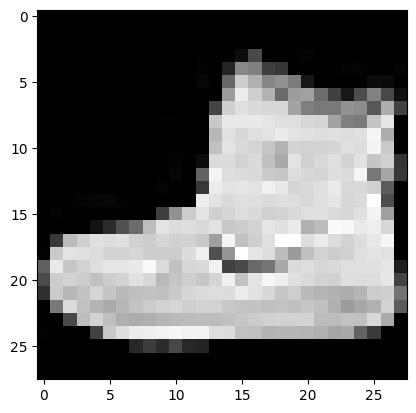

In [234]:
plt.imshow(single_data,cmap='gray')

In [235]:
single_data.shape

(28, 28)

In [236]:
single_data

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [237]:
x_train.max()

255

In [238]:
x_train.max()

255

In [239]:
x_train = x_train / x_train.max()

In [240]:
x_test = x_test / x_test.max()

In [241]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [242]:
x_train.shape

(60000, 28, 28)

In [243]:
x_train = x_train.reshape(60000,28,28,1)

In [244]:
x_train.shape

(60000, 28, 28, 1)

In [245]:
x_test.shape

(10000, 28, 28)

In [246]:
x_test = x_test.reshape(10000,28,28,1)

In [247]:
x_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [248]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [249]:
from keras.utils import to_categorical

In [250]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [251]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [252]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [253]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

# 한번에
# model = Squential([
#     Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'),
#     MaxPooling2D(pool_size=(2,2)),
#     Flatten(),
#     Dense(128,activation='relu'),
#     Dense(10,activation='softmax')
# ])

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [254]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 4608)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               589952    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [255]:
x_train.shape

(60000, 28, 28, 1)

In [256]:
y_cat_train.shape

(60000, 10)

## batch_size를 지정해주지 않았기 때문에 batch_size=32로 설정된다

In [257]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4032 - accuracy: 0.8572
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2793 - accuracy: 0.8996
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2401 - accuracy: 0.9133
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2145 - accuracy: 0.9219
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1974 - accuracy: 0.9296
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1829 - accuracy: 0.9349
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1694 - accuracy: 0.9406
Epoch 8/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1591 - accuracy: 0.9440
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1481 - accuracy: 0.9481
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step -

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [258]:
model.metrics_names

['loss', 'accuracy']

In [259]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3361 - accuracy: 0.9044


[0.33606329560279846, 0.9043999910354614]

In [260]:
import numpy as np
from sklearn.metrics import classification_report

In [261]:
predictions = np.argmax(model.predict(x_test),axis=-1)

313/313 [==============================] - 1s 3ms/step


In [262]:
predictions[0]

9

In [263]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1000
           1       1.00      0.97      0.98      1000
           2       0.83      0.87      0.85      1000
           3       0.94      0.88      0.91      1000
           4       0.83      0.90      0.86      1000
           5       0.98      0.97      0.98      1000
           6       0.79      0.67      0.72      1000
           7       0.97      0.94      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



# Great Job!